In [6]:
'''
#Colab specific code
!pip install pandas_ta

from google.colab import drive
drive.mount('/content/drive')
'''

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
'''
I have used the first 100000, 50000 and 10000 rows of df to experiment and try to
optimise different hyperparameters (h, train/test split, layer sizes, activation 
function, optimizer, epochs) since it would take hours to add all the indicators 
to every row of df. 
When I refer to 'the guide' I mean MLatLSE_challenge_nn_stock_pred.pdf. 
I left out some indicators without specific explanation due to unclear 
documentation or not understanding their output.
'''

"\nI have used the first 100000, 50000 and 10000 rows of df to experiment and try to\noptimise different hyperparameters (h, train/test split, layer sizes, activation \nfunction, optimizer, epochs) since it would take hours to add all the indicators \nto every row of df. \nWhen I refer to 'the guide' I mean MLatLSE_challenge_nn_stock_pred.pdf. \nI left out some indicators without specific explanation due to unclear \ndocumentation or not understanding their output.\n"

In [1]:
"""
Hi all, this is the starting point of the Machine Learning challenge.

Follow the instructions on the pdf and remember to comment your code for 
clarity.

The library for technical indicators is here: 
    
    https://github.com/twopirllc/pandas-ta

The number of indicators should be 84, but it depends how you decide to code
them. As a consequence, remember to vary the size of the input layer in the 
neural network.

Good luck!

Gabriele
"""

import pandas as pd
import pandas_ta as ta

#df = pd.read_csv('/content/drive/My Drive/Datasets/bitstampUSD_1-min_data_2012-01-01_to_2019-08-12.csv', sep=',', header=0)
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2019-08-12.csv', sep=',', header=0)

# Clean NaN values
df = df.dropna(axis=0)

#Taking a subset to speed up development 
#df = df.head(10000)

# Initialize Bollinger Bands Indicator
df2=ta.bbands(close=df["Close"], length = 20, std = 2)

# Add Bollinger Bands features
df['bbL']=df2.iloc[:,0]
df['bbM']=df2.iloc[:,1]
df['bbU']=df2.iloc[:,2]

# Add Awesome Oscillator
df["ao"]=ta.ao(high=df["High"],low=df["Low"])

# Add more stuff
df["apo"]=ta.apo(close=df["Close"])
df["bop"]=ta.bop(open_=df["Open"],high=df["High"],low=df["Low"],close=df["Close"])
df["cci"]=ta.cci(high=df["High"],low=df["Low"],close=df["Close"])
df["cg"]=ta.cg(close=df["Close"])
df["cmo"]=ta.cmo(close=df["Close"])
df["cpk"]=ta.coppock(close=df["Close"])
#df["fish"]=ta.fisher(high=df["High"],low=df["Low"])
#df["kst"]=ta.kst(close=df["Close"])
#df["macd"]=ta.macd(close=df["Close"])
df["mom"]=ta.mom(close=df["Close"])
#df["ppo"]=ta.ppo(close=df["Close"])
df["roc"]=ta.roc(close=df["Close"])
df["rsi"]=ta.rsi(close=df["Close"])
#df["rvi"]=ta.rvi(open_=df["Open"],high=df["High"],low=df["Low"],close=df["Close"])
df["slope"]=ta.slope(close=df["Close"])
#df["stoch"]=ta.stoch(high=df["High"],low=df["Low"],close=df["Close"])
df["trix"]=ta.trix(close=df["Close"])
df["tsi"]=ta.tsi(close=df["Close"])
df["uo"]=ta.uo(high=df["High"],low=df["Low"],close=df["Close"])
df["willr"]=ta.willr(high=df["High"],low=df["Low"],close=df["Close"])

''' To complete

Technical Analysis Indicators (by Category)

Momentum (21)
Awesome Oscillator: ao
Absolute Price Oscillator: apo
Balance of Power: bop
Commodity Channel Index: cci
Center of Gravity: cg
Chande Momentum Oscillator: cmo
Coppock Curve: coppock
Fisher Transform: fisher
KST Oscillator: kst
Moving Average Convergence Divergence: macd
Momentum: mom
Percentage Price Oscillator: ppo
Rate of Change: roc
Relative Strength Index: rsi
Relative Vigor Index: rvi
Slope: slope
Stochastic Oscillator: stoch
Trix: trix
True strength index: tsi
Ultimate Oscillator: uo
Williams %R: willr
Moving Average Convergence Divergence (MACD)

Overlap (24)
Double Exponential Moving Average: dema
Exponential Moving Average: ema
Fibonacci's Weighted Moving Average: fwma
High-Low Average: hl2
High-Low-Close Average: hlc3
Commonly known as 'Typical Price' in Technical Analysis literature
Hull Exponential Moving Average: hma
Kaufman's Adaptive Moving Average: kama
Ichimoku Kinkō Hyō: ichimoku
Linear Regression: linreg
Midpoint: midpoint
Midprice: midprice
Open-High-Low-Close Average: ohlc4
Pascal's Weighted Moving Average: pwma
William's Moving Average: rma
Simple Moving Average: sma
Sine Weighted Moving Average: sinwma
Symmetric Weighted Moving Average: swma
T3 Moving Average: t3
Triple Exponential Moving Average: tema
Triangular Moving Average: trima
Volume Weighted Average Price: vwap
Volume Weighted Moving Average: vwma
Weighted Moving Average: wma
Zero Lag Moving Average: zlma

Performance (3)

Log Return: log_return
Percent Return: percent_return
Trend Return: trend_return
Percent Return (Cumulative) with Simple Moving Average (SMA)

Statistics (8)
Kurtosis: kurtosis
Mean Absolute Deviation: mad
Median: median
Quantile: quantile
Skew: skew
Standard Deviation: stdev
Variance: variance
Z Score: zscore
Z Score

Trend (11)
Average Directional Movement Index: adx
Archer Moving Averages Trends: amat
Aroon Oscillator: aroon
Decreasing: decreasing
Detrended Price Oscillator: dpo
Increasing: increasing
Linear Decay: linear_decay
Long Run: long_run
Q Stick: qstick
Short Run: short_run
Vortex: vortex
Average Directional Movement Index (ADX)

Utility (1)
Cross: cross

Volatility (8)
Acceleration Bands: accbands
Average True Range: atr
Bollinger Bands: bbands
Donchian Channel: donchian
Keltner Channel: kc
Mass Index: massi
Normalized Average True Range: natr
True Range: true_range
Average True Range (ATR)

Volume (13)
Accumulation/Distribution Index: ad
Accumulation/Distribution Oscillator: adosc
Archer On-Balance Volume: aobv
Chaikin Money Flow: cmf
Elder's Force Index: efi
Ease of Movement: eom
Money Flow Index: mfi
Negative Volume Index: nvi
On-Balance Volume: obv
Positive Volume Index: pvi
Price-Volume: pvol
Price Volume Trend: pvt
Volume Profile: vp
'''

bbands done


" To complete\n\nTechnical Analysis Indicators (by Category)\n\nMomentum (21)\nAwesome Oscillator: ao\nAbsolute Price Oscillator: apo\nBalance of Power: bop\nCommodity Channel Index: cci\nCenter of Gravity: cg\nChande Momentum Oscillator: cmo\nCoppock Curve: coppock\nFisher Transform: fisher\nKST Oscillator: kst\nMoving Average Convergence Divergence: macd\nMomentum: mom\nPercentage Price Oscillator: ppo\nRate of Change: roc\nRelative Strength Index: rsi\nRelative Vigor Index: rvi\nSlope: slope\nStochastic Oscillator: stoch\nTrix: trix\nTrue strength index: tsi\nUltimate Oscillator: uo\nWilliams %R: willr\nMoving Average Convergence Divergence (MACD)\n\nOverlap (24)\nDouble Exponential Moving Average: dema\nExponential Moving Average: ema\nFibonacci's Weighted Moving Average: fwma\nHigh-Low Average: hl2\nHigh-Low-Close Average: hlc3\nCommonly known as 'Typical Price' in Technical Analysis literature\nHull Exponential Moving Average: hma\nKaufman's Adaptive Moving Average: kama\nIchimok

In [2]:
#Returns KeyError: 4
#df["fish"] = ta.fisher(high = df["High"], low = df["Low"])
df["kst"] = ta.kst(close = df["Close"]).iloc[:,0]
df["kstS"] = ta.kst(close = df["Close"]).iloc[:,1]
#MACD is the same as APO. Outputs macd, histogram (macd - signal) and signal (EMA of macd) 
#df["macd"] = ta.macd(close = df["Close"])
#Percentage Price Oscillator; similar to MACD. Outputs ppo, histogram (ppo - signal) and signal (EMA of ppo)
df["ppo"] = ta.macd(close = df["Close"]).iloc[:,0]
#Outputs rvi and rvis. No mention of rvis in documentation
df["rvi"] = ta.rvi(open_ = df["Open"], high = df["High"], low = df["Low"], close = df["Close"]).iloc[:,0]
#Does not output %K and %D values; only fastk, fastd, slowk, slowd
#df["stoch"] = ta.stoch(high = df["High"], low = df["Low"], close = df["Close"])

In [3]:
df["dema"] = ta.dema(close = df["Close"])
df["ema"] = ta.ema(close = df["Close"])
df["fwma"] = ta.fwma(close = df["Close"])
df["hl2"] = ta.hl2(high = df["High"], low = df["Low"])
df["hlc3"] = ta.hlc3(high = df["High"], low = df["Low"], close = df["Close"])
df["hma"] = ta.hma(close = df["Close"])
#length argument must be specified, else we get KeyError: 10
df["kama"] = ta.kama(close = df["Close"], length = len(df["Close"]))
#See documentation. Outputs a tuple
#df["ichimoku"] = ta.ichimoku(high = df["High"], low = df["Low"], close = df["Close"])
df["linreg"] = ta.linreg(close = df["Close"])
df["midpoint"] = ta.midpoint(close = df["Close"])
df["midprice"] = ta.midprice(high = df["High"], low = df["Low"], )
df["ohlc4"] = ta.ohlc4(open_ = df["Open"], high = df["High"], low = df["Low"], close = df["Close"])
df["pwma"] = ta.pwma(close = df["Close"])
df["rma"] = ta.rma(close = df["Close"])
df["sma"] = ta.sma(close = df["Close"])
df["sinwma"] = ta.sinwma(close = df["Close"])
df["swma"] = ta.swma(close = df["Close"])
df["t3"] = ta.t3(close = df["Close"])
df["tema"] = ta.tema(close = df["Close"])
df["trima"] = ta.trima(close = df["Close"])
df["vwap"] = ta.vwap(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume_(BTC)"])
df["vwma"] = ta.vwma(close = df["Close"], volume = df["Volume_(BTC)"])
df["wma"] = ta.wma(close = df["Close"])
df["zlma"] = ta.zlma(close = df["Close"])

In [5]:
df["log_return"] = ta.log_return(close = df["Close"])
df["percent_return"] = ta.percent_return(close = df["Close"])
#NA values in df["sma"]
#df["trend_return"] = ta.trend_return(close = df["Close"], trend = df["sma"], log = False, cumulative = True)

In [6]:
df["kurtosis"] = ta.kurtosis(close = df["Close"])
df["mad"] = ta.mad(close = df["Close"])
df["median"] = ta.median(close = df["Close"])
df["quantile"] = ta.quantile(close = df["Close"])
df["skew"] = ta.skew(close = df["Close"])
df["stdev"] = ta.stdev(close = df["Close"])
df["variance"] = ta.variance(close = df["Close"])
df["zscore"] = ta.zscore(close = df["Close"])

In [7]:
#Outputs a dataframe with columns 'ADX_14', 'DMP_14', 'DMN_14'. 
#We will use only the ADX_14 column, since documentation does not mention dmp or dmn
df["adx"] = ta.adx(high = df["High"], low = df["Low"], close = df["Close"]).iloc[:,0]
#No documentation. Outputs a dataframe with columns 'AMAT_LR_2', 'AMAT_SR_2'
#df["amat"] = ta.amat(close = df["Close"])['AMAT_LR_2']
df["aroonD"] = ta.aroon(close = df["Close"]).iloc[:,0]
df["aroonU"] = ta.aroon(close = df["Close"]).iloc[:,1]

In [8]:
df["decreasing"] = ta.decreasing(close = df["Close"])
df["dpo"] = ta.dpo(close = df["Close"])
df["increasing"] = ta.increasing(close = df["Close"])
#Returned KeyErrors when using the last few rows of df
#df["linear_decay"] = ta.linear_decay(close = df["Close"])
#No documentation. Returns ? features
#df["long_run"] = ta.long_run(fast = , slow = )   
df["qstick"] = ta.qstick(open_ = df["Open"], close = df["Close"])
#No documentation. Returns ? features
#df["short_run"] = ta.short_run(fast = , slow = )
df["vortexVIP"] = ta.vortex(high = df["High"], low = df["Low"], close = df["Close"]).iloc[:,0]
df["vortexVIM"] = ta.vortex(high = df["High"], low = df["Low"], close = df["Close"]).iloc[:,1]

In [9]:
#No documentation
#df["cross"] = ta.cross(series_a = , series_b = )

In [10]:
df["accbandsL"] = ta.accbands(high = df["High"], low = df["Low"], close = df["Close"]).iloc[:,0]
df["accbandsM"] = ta.accbands(high = df["High"], low = df["Low"], close = df["Close"]).iloc[:,1]
df["accbandsU"] = ta.accbands(high = df["High"], low = df["Low"], close = df["Close"]).iloc[:,2]
df["atr"] = ta.atr(high = df["High"], low = df["Low"], close = df["Close"])
df["donchianL"] = ta.donchian(close = df["Close"]).iloc[:,0]
df["donchianM"] = ta.donchian(close = df["Close"]).iloc[:,1]
df["donchianU"] = ta.donchian(close = df["Close"]).iloc[:,2]
df["kcL"] = ta.kc(high = df["High"], low = df["Low"], close = df["Close"]).iloc[:,0]
df["kcB"] = ta.kc(high = df["High"], low = df["Low"], close = df["Close"]).iloc[:,1]
df["kcU"] = ta.kc(high = df["High"], low = df["Low"], close = df["Close"]).iloc[:,2]
df["massi"] = ta.massi(high = df["High"], low = df["Low"])
df["natr"] = ta.natr(high = df["High"], low = df["Low"], close = df["Close"])
df["true_range"] = ta.true_range(high = df["High"], low = df["Low"], close = df["Close"])

In [11]:
df["ad"] = ta.ad(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume_(BTC)"])
df["adosc"] = ta.adosc(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume_(BTC)"])
#No documentation. Returns 7 features
#df["aobv"] = ta.aobv(close = df["Close"], volume = df["Volume_(BTC)"])
df["cmf"] = ta.cmf(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume_(BTC)"])
df["efi"] = ta.efi(close = df["Close"], volume = df["Volume_(BTC)"])
df["eom"] = ta.eom(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume_(BTC)"])
df["mfi"] = ta.mfi(high = df["High"], low = df["Low"], close = df["Close"], volume = df["Volume_(BTC)"])
df["nvi"] = ta.nvi(close = df["Close"], volume = df["Volume_(BTC)"])
df["obv"] = ta.obv(close = df["Close"], volume = df["Volume_(BTC)"])
df["pvi"] = ta.pvi(close = df["Close"], volume = df["Volume_(BTC)"])
df["pvol"] = ta.pvol(close = df["Close"], volume = df["Volume_(BTC)"])
df["pvt"] = ta.pvt(close = df["Close"], volume = df["Volume_(BTC)"])
#See documentation. Returns 6 features
#df["vp"] = ta.vp(close = df["Close"], volume = df["Volume_(BTC)"])

In [12]:
df.to_csv('df.csv', encoding='utf-8', index=False)

In [19]:
'''
help(ta.___)

df3 = ta.___()
df3
'''

'\nhelp(ta.___)\n\ndf3 = ta.___()\ndf3\n'

In [13]:
import numpy as np
def Stationarise(a, b):
    p = np.log((np.array(a)/np.array(b)))
    return p

In [14]:
#Define predictor dataframe
X = pd.DataFrame({})

#Stationarising data
#Price-like 
X["Close"] = Stationarise(df["Close"][1:], df["Close"][:(len(df["Close"]) - 1)])
X["Volume_(BTC)"] = Stationarise(df["Volume_(BTC)"][1:], df["Volume_(BTC)"][:(len(df["Close"]) - 1)])
X["Volume_(Currency)"] = Stationarise(df["Volume_(Currency)"][1:], df["Volume_(Currency)"][:(len(df["Close"]) - 1)])
X["Weighted_Price"] = Stationarise(df["Weighted_Price"][1:], df["Weighted_Price"][:(len(df["Close"]) - 1)])
#Moving averages
X["bbL"] = Stationarise(df["bbL"][1:], df["Close"][1:])
X["bbM"] = Stationarise(df["bbM"][1:], df["Close"][1:])
X["bbU"] = Stationarise(df["bbU"][1:], df["Close"][1:])
#Calculated over a period, so will be treated as moving averages
X["ao"] = Stationarise(df["ao"][1:], df["Close"][1:])
X["apo"] = Stationarise(df["apo"][1:], df["Close"][1:])
#Not calculated over a period
X["bop"] = Stationarise(df["bop"][1:], df["bop"][:(len(df["Close"]) - 1)])
#Calculated over a period, so will be treated as moving averages
X["cci"] = Stationarise(df["cci"][1:], df["Close"][1:])
X["cg"] = Stationarise(df["cg"][1:], df["Close"][1:])
#Inconsistency in documentation
#X["cmo"] = Stationarise(df["cmo"][1:], df["Close"][1:])
#Calculated over a period, so will be treated as a moving average
X["cpk"] = Stationarise(df["cpk"][1:], df["Close"][1:])
#not calculated over a period
X["mom"] = Stationarise(df["mom"][1:], df["mom"][:(len(df["Close"]) - 1)])
X["roc"] = Stationarise(df["roc"][1:], df["roc"][:(len(df["Close"]) - 1)])
X["rsi"] = Stationarise(df["rsi"][1:], df["rsi"][:(len(df["Close"]) - 1)])
X["slope"] = Stationarise(df["slope"][1:], df["slope"][:(len(df["Close"]) - 1)])
#Calculated over a period, so will be treated as moving averages
X["trix"] = Stationarise(df["trix"][1:], df["Close"][1:])
X["tsi"] = Stationarise(df["tsi"][1:], df["Close"][1:])
X["uo"] = Stationarise(df["uo"][1:], df["Close"][1:])
X["willr"] = Stationarise(df["willr"][1:], df["Close"][1:])
X["kst"] = Stationarise(df["kst"][1:], df["Close"][1:])
X["kstS"] = Stationarise(df["kstS"][1:], df["Close"][1:])
X["ppo"] = Stationarise(df["ppo"][1:], df["Close"][1:])
X["rvi"] = Stationarise(df["rvi"][1:], df["Close"][1:])
#Moving averages
X["dema"] = Stationarise(df["dema"][1:], df["Close"][1:])
X["ema"] = Stationarise(df["ema"][1:], df["Close"][1:])
X["fwma"] = Stationarise(df["fwma"][1:], df["Close"][1:])
X["hl2"] = Stationarise(df["hl2"][1:], df["Close"][1:])
X["hlc3"] = Stationarise(df["hlc3"][1:], df["Close"][1:])
X["hma"] = Stationarise(df["hma"][1:], df["Close"][1:])
X["kama"] = Stationarise(df["kama"][1:], df["Close"][1:])
X["linreg"] = Stationarise(df["linreg"][1:], df["Close"][1:])
#Should these be treated as prices?
X["midpoint"] = Stationarise(df["midpoint"][1:], df["midpoint"][:(len(df["Close"]) - 1)])
X["midprice"] = Stationarise(df["midprice"][1:], df["midprice"][:(len(df["Close"]) - 1)])
X["ohlc4"] = Stationarise(df["ohlc4"][1:], df["ohlc4"][:(len(df["Close"]) - 1)])
#Moving averages
X["pwma"] = Stationarise(df["pwma"][1:], df["Close"][1:])
X["rma"] = Stationarise(df["rma"][1:], df["Close"][1:])
X["sma"] = Stationarise(df["sma"][1:], df["Close"][1:])
X["sinwma"] = Stationarise(df["sinwma"][1:], df["Close"][1:])
X["t3"] = Stationarise(df["t3"][1:], df["Close"][1:])
X["tema"] = Stationarise(df["tema"][1:], df["Close"][1:])
X["trima"] = Stationarise(df["trima"][1:], df["Close"][1:])
#Should this be treated as a price?
X["vwap"] = Stationarise(df["vwap"][1:], df["vwap"][:(len(df["Close"]) - 1)])
#Moving averages
X["vwma"] = Stationarise(df["vwma"][1:], df["Close"][1:])
X["wma"] = Stationarise(df["wma"][1:], df["Close"][1:])
X["zlma"] = Stationarise(df["zlma"][1:], df["Close"][1:])
#Should these be stationarised? As prices or moving averages?
X["log_return"] = df["log_return"]
X["percent_return"] = df["percent_return"]
#Calculated over a period, so will be treated as moving averages
X["kurtosis"] = Stationarise(df["kurtosis"][1:], df["Close"][1:])
X["mad"] = Stationarise(df["mad"][1:], df["Close"][1:])
X["median"] = Stationarise(df["median"][1:], df["Close"][1:])
X["quantile"] = Stationarise(df["quantile"][1:], df["Close"][1:])
X["skew"] = Stationarise(df["skew"][1:], df["Close"][1:])
X["stdev"] = Stationarise(df["stdev"][1:], df["Close"][1:])
X["variance"] = Stationarise(df["variance"][1:], df["Close"][1:])
X["zscore"] = Stationarise(df["zscore"][1:], df["Close"][1:])
X["adx"] = Stationarise(df["adx"][1:], df["Close"][1:])
#?
#X["aroonD"] = Stationarise(df["aroonD"][1:], df["Close"][1:])
#X["aroonU"] = Stationarise(df["aroonU"][1:], df["Close"][1:])
#Boolean series
X["decreasing"] = df["decreasing"]
#Not calculated over a period
X["dpo"] = Stationarise(df["dpo"][1:], df["dpo"][:(len(df["Close"]) - 1)])
#Boolean series
X["increasing"] = df["increasing"]
#Calculated over a period, so will be treated as moving averages. Contradictions in documentation
#X["linear_decay"] = Stationarise(df["linear_decay"][1:], df["Close"][1:])
#X["qstick"] = Stationarise(df["qstick"][1:], df["Close"][1:])
#Calculated over a period, so will be treated as moving averages
X["vortexVIP"] = Stationarise(df["vortexVIP"][1:], df["Close"][1:])
X["vortexVIM"] = Stationarise(df["vortexVIM"][1:], df["Close"][1:])
#Moving averages
X["accbandsL"] = Stationarise(df["accbandsL"][1:], df["Close"][1:])
X["accbandsM"] = Stationarise(df["accbandsM"][1:], df["Close"][1:])
X["accbandsU"] = Stationarise(df["accbandsU"][1:], df["Close"][1:])
X["atr"] = Stationarise(df["atr"][1:], df["Close"][1:])
X["donchianL"] = Stationarise(df["donchianL"][1:], df["Close"][1:])
X["donchianM"] = Stationarise(df["donchianM"][1:], df["Close"][1:])
X["donchianU"] = Stationarise(df["donchianU"][1:], df["Close"][1:])
X["kcL"] = Stationarise(df["kcL"][1:], df["Close"][1:])
X["kcB"] = Stationarise(df["kcB"][1:], df["Close"][1:])
X["kcU"] = Stationarise(df["kcU"][1:], df["Close"][1:])
#Calculated over a period, so will be treated as moving averages
X["massi"] = Stationarise(df["massi"][1:], df["Close"][1:])
X["natr"] = Stationarise(df["natr"][1:], df["Close"][1:])
#?
#X["true_range"] = Stationarise(df["true_range"][1:], df["true_range"][:(len(df["Close"]) - 1)])
#Not calculated over a period
X["ad"] = Stationarise(df["ad"][1:], df["ad"][:(len(df["Close"]) - 1)])
X["adosc"] = Stationarise(df["adosc"][1:], df["adosc"][:(len(df["Close"]) - 1)])
#Calculated over a period, so will be treated as moving averages
X["cmf"] = Stationarise(df["cmf"][1:], df["Close"][1:])
X["efi"] = Stationarise(df["efi"][1:], df["Close"][1:])
X["eom"] = Stationarise(df["eom"][1:], df["Close"][1:])
X["mfi"] = Stationarise(df["mfi"][1:], df["Close"][1:])
X["nvi"] = Stationarise(df["nvi"][1:], df["Close"][1:])
#Volume-like
X["obv"] = Stationarise(df["obv"][1:], df["obv"][:(len(df["Close"]) - 1)])
#Calculated over a period, so will be treated as a moving average
X["pvi"] = Stationarise(df["pvi"][1:], df["Close"][1:])
#Volume-like
X["pvol"] = Stationarise(df["pvol"][1:], df["pvol"][:(len(df["Close"]) - 1)])
#Not calculated over a period
X["pvt"] = Stationarise(df["pvt"][1:], df["pvt"][:(len(df["Close"]) - 1)])


#df["___"][1:] is the 't' series, df["___"][:(len(df["Close"]) - 1)] is the 't-1' series
#'Not calculated over a period' means the indicator is a transformation of price 
#or the first difference of prices. Many of these variables can be calculated 
#over a period by changing the default value of some of their arguments. 


#Add a row of NaNs to the top of X to ensure it aligns with timestamp
X.loc[-1] = [np.nan] * len(X.columns)
X.index = X.index + 1 
X = X.sort_index()

/Users/Sanjit/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Sanjit/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Sanjit/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Sanjit/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
X.to_csv('X.csv', encoding='utf-8', index=False)

In [16]:
'''
For cryptocurrencies, a google search showed that commissions average between 
0.1% and 0.25% of the trade value. We will therefore assume commission is 0.1% 
of £10000 i.e. £10 per transaction. According to 
https://data.bitcoinity.org/markets/spread/5y/USD?c=e&f=m10&st=log&t=l, the 
bid-ask spread averages from between 0.01% and 1% of the trade value. We will 
therefore assume the bid-ask spread is 0.01% of £10000 i.e. £1 per transaction. 
So our roundtrip cost is c = £22. 

As h approaches the length of df, the model accuracy approaches 100%. 
What may be happenining is that the model always predicts the price will go up, 
and it has over long time horizons for BTC. 
The average time difference between close prices varies across the dataset, with
around 25 mins in 2011 and around 1 minute in 2018. 

'''
c = 22
h = 300
capital = 10000

In [17]:
#Mean time difference between close prices
print ("Mean number of seconds between reported close prices: ",
       np.mean(df["Timestamp"].diff()[1:]))

Mean number of seconds between reported close prices:  86.86402359085088


In [18]:
#Taking [ClosePrice(t+h)-ClosePrice(t)] / ClosePrice(t) for each t
#Computed on non-stationarised close price
def FutureReturn(p, h):
  fr = np.array([])
  for i in range(len(p) - h):
    fr = np.append(fr, ((p.iloc[i + h] - p.iloc[i]) / p.iloc[i]))
  return fr

#Multiply by capital 
future_return = FutureReturn(df["Close"], h) * capital

In [19]:
#Creating target data, Y 
#Code "UP" as 0, "FLAT" as 1, "DOWN" as 2 (model expects non-negative integers)
Y = pd.Series([])
for r in future_return:
  if r > c:
    Y = Y.append(pd.Series([0]))
  elif -c < r < c:
    Y = Y.append(pd.Series([1]))
  elif r < -c:
    Y = Y.append(pd.Series([2]))
#We need the last h values to be NaN so that the series is as long as X
Y = Y.append(pd.Series([np.nan] * h))

/Users/Sanjit/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: 

In [0]:
#Merging X and Y into D
D = pd.DataFrame({})
D = pd.concat([D, X], axis = 1)
#The below step is needed in order for the step below it to work
Y = Y.reset_index(drop = True)
D = pd.concat([D, Y], axis = 1)

In [29]:
'''
#Counting inf/NaN values
count = 0
for i in D.columns:
  for j in np.isnan(D[i]):
    if j == True:
      count += 1
print(count)
'''

'\n#Counting inf/NaN values\ncount = 0\nfor i in D.columns:\n  for j in np.isnan(D[i]):\n    if j == True:\n      count += 1\nprint(count)\n'

In [0]:
#Dealing with NaN/inf values
#Drop last h rows
D = D.drop(D.index[range(len(D.index) - h, len(D.index))])
#Convert inf values to NaN
#Drop rows and columns which only contain NaNs
D = D.replace([np.inf, -np.inf], np.nan)
D = D.dropna(axis = 0, how = "all")
D = D.dropna(axis = 1, how = "all")
#Drop columns which mostly contain NaNs
D = D.dropna(axis = 1, thresh = 0.50 * len(D["Close"]))

#Replace NaNs with 0
D = D.replace([np.nan], 0)
#Without the above step, all predicted probabilities were NaNs

In [0]:
#Splitting into training and testing sets, i.e. subsetting D
from sklearn.model_selection import train_test_split
train_split, test_split = train_test_split(D, test_size = 0.30)
#test_size is the proportion of the data to be used for testing
#test_size = 0.3 gave much lower crossentropy scores than 0.2 or 0.4, with
#similar loss and accuracy scores

In [32]:
'''
Helpful sources for building a model and generating predictions:
https://www.tensorflow.org/tutorials/keras/classification
Documentation for functions used in the above source
'''

'\nHelpful sources for building a model and generating predictions:\nhttps://www.tensorflow.org/tutorials/keras/classification\nDocumentation for functions used in the above source\n'

In [0]:
import tensorflow as tf
#tensorflow expects float32 numbers rather than float64
train_split = train_split.astype('float32')
test_split = test_split.astype('float32')

#Demerging X and Y from subsets of D
#The column name of Y in D is 0
train_target = train_split.pop(0)
test_target = test_split.pop(0)
#train_split is from X, train_target is from Y, both used to train
#test_split is from X, test_target is from Y, both used to test

In [0]:
#Input layer size: train_split.iloc[0].shape (around 70)
#Middle layer sizes: 37, 11
#Output layer size: 3
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = train_split.iloc[0].shape),
                             tf.keras.layers.Dense(37, activation='relu'),
                             tf.keras.layers.Dense(11, activation='relu'),
                             tf.keras.layers.Dense(3),
                             ])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy', 'crossentropy'])

In [35]:
model.fit(train_split, train_target, epochs = 7)

Epoch 1/7
213/213 [==============================] - 0s 1ms/step - loss: 0.8365 - accuracy: 0.6424 - crossentropy: 3.1991
Epoch 2/7
213/213 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.7121 - crossentropy: 2.5674
Epoch 3/7
213/213 [==============================] - 0s 1ms/step - loss: 0.6687 - accuracy: 0.7197 - crossentropy: 2.7461
Epoch 4/7
213/213 [==============================] - 0s 1ms/step - loss: 0.6630 - accuracy: 0.7168 - crossentropy: 2.7648
Epoch 5/7
213/213 [==============================] - 0s 1ms/step - loss: 0.6535 - accuracy: 0.7234 - crossentropy: 2.8918
Epoch 6/7
213/213 [==============================] - 0s 1ms/step - loss: 0.6503 - accuracy: 0.7274 - crossentropy: 2.9538
Epoch 7/7
213/213 [==============================] - 0s 1ms/step - loss: 0.6422 - accuracy: 0.7295 - crossentropy: 2.8898


In [0]:
#Adding softmax layer 
probability_model = tf.keras.Sequential([model, 
                                        tf.keras.layers.Softmax()])
#Generating prediction vectors with probabilities
predictions = probability_model.predict(test_split)

In [0]:
#Creating predicted vectors of state (in the format in d. 1)) from predictions
#Define the array in this shape to avoid errors when using np.append  
classified_preds = np.array([[0, 0, 0]])
for i in range(len(predictions)):
  for j in range(3):
    if max(predictions[i]) == predictions[i][j]:
      dummy = np.array([0, 0, 0])
      dummy[j] = 1
      classified_preds = np.append(classified_preds, np.array([dummy]), axis = 0)
#Remove first element, which was used to set shape
classified_preds = np.delete(classified_preds, 0, axis = 0)

#Creating actual vectors of state (in the format in d. 1)) from test_target
#Define the array in this shape to avoid errors when using np.append
actual = np.array([[0, 0, 0]])
for i in range(len(test_target)):
  if test_target.iloc[i] == 0:
    actual = np.append(actual, np.array([[1, 0, 0]]), axis = 0)
  elif test_target.iloc[i] == 1:
    actual = np.append(actual, np.array([[0, 1, 0]]), axis = 0)
  elif test_target.iloc[i] == 2:
    actual = np.append(actual, np.array([[0, 0, 1]]), axis = 0)
#Remove first element, which was used to set shape
actual = np.delete(actual, 0, axis = 0)

In [38]:
#Statistic is the sum of the values of the vector returned by computing the 
#statistic defined in d. 2); it is the number of incorrect classifications
statistic = sum(0.5 * sum(((classified_preds - actual) ** 2)))
accuracy = (len(test_target) - statistic) / (len(test_target))
print ("Model accuracy, as defined in the guide: ", accuracy)

Model accuracy, as defined in the guide:  0.7189003436426117


In [0]:
p = 0.7

close = df["Close"][:(len(df["Close"]) - h)]

eval_target = D.pop(0)
eval_predictions = probability_model.predict(D)

signals = []
for i in range(len(close)): 
  if eval_predictions[i][0] > p:
    signals.append("BUY")
  elif eval_predictions[i][2] > p:
    signals.append("SELL")
  else:
    signals.append("HOLD")

In [0]:
positions = pd.DataFrame({"Close": close,
                          "Signal": signals,
                          "P/L": [[]]* len(close)})
positions = positions.reset_index(drop = True)

In [41]:
#Have already set transaction costs at c = 22 above
running_index = 0
long_quantity = 0
short_quantity = 0
previous_price = 0
#Index of previous execution price
previous_price_index = 0
#exposure is 'capital' as described in the guide
exposure = 10000
#Series of profit/loss for each executed trade
pl = []

while running_index <= (len(signals) - 1):
  if (signals[running_index] == "BUY") and (long_quantity == 0):
    #Close short position
    pl.append(short_quantity * (previous_price - close.iloc[running_index]) - c)

    positions["P/L"].iloc[previous_price_index] = (short_quantity * (previous_price - close.iloc[running_index]) - c)

    short_quantity = 0
    #Enter long position
    long_quantity = exposure / close.iloc[running_index]
    previous_price = close.iloc[running_index]

    previous_price_index = running_index

    running_index += 1
  elif (signals[running_index] == "SELL") and (short_quantity == 0):
    #Close long position
    pl.append(long_quantity * (close.iloc[running_index] - previous_price) - c)

    positions["P/L"].iloc[previous_price_index] = (long_quantity * (close.iloc[running_index] - previous_price) - c)

    long_quantity = 0
    #Enter short position
    short_quantity = exposure / close.iloc[running_index]
    previous_price = close.iloc[running_index]

    previous_price_index = running_index

    running_index += 1
  running_index += 1
  continue

#Remove first value of pl, which is always -c  
pl.pop(0)

running_capital = np.cumsum(pl) + 10000

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


<function matplotlib.pyplot.show>

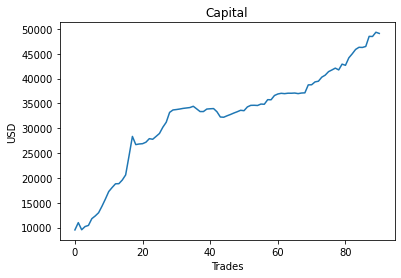

In [42]:
#A time series of capital, not daily
import matplotlib.pyplot as plt
plt.plot(running_capital)
plt.xlabel("Trades")
plt.ylabel("USD")
plt.title("Capital")
plt.show